# Evaluación MAA 2025 - Informe - Pablo Pandolfo
---

# Punto 1
---

## Objetivo del análisis
---

* Elaborar un modelo de regresión que permita predecir el precio de la cena

## Datos utilizados
---

* Se analizaron datos de 163 restaurantes, incluyendo las siguientes variables:

| Variable     | Descripción                                                                                         |
| --           | --                                                                                                  |
| **precio**   | precio promedio (en dólares) de una cena con bebida y propina incluida                              |
| **cal1**     | calificación otorgada por los clientes a la comida (escala de 0 a 30)                               |

## Metodología
---

1. Se explora como se relacionan las variables **cal1** y **precio** entre sí, utilizando un gráfico de dispersión (scatter plot)

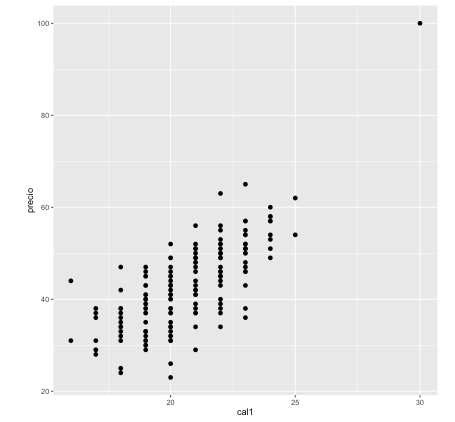


* El gráfico muestra la presencia de una relación lineal entre ambas variables

2. Se obtiene el coeficiente de correlación lineal mediante el test: Pearson's product-moment correlation
    * Su valor fue de *0.749*, observando una correlación lineal fuerte y positiva

3. Se propone un modelo de regresión lineal simple, donde la variable **precio** es la variable respuesta y la variable **cal1** es la variable explicativa o predictora

```
Call:
lm(formula = precio ~ cal1, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.6993  -4.1449   0.2736   3.8551  24.4366 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -29.0290     5.0432  -5.756 4.24e-08 ***
cal1          3.4864     0.2428  14.362  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.496 on 161 degrees of freedom
Multiple R-squared:  0.5616,	Adjusted R-squared:  0.5589 
F-statistic: 206.3 on 1 and 161 DF,  p-value: < 2.2e-16
```

* Se observan p-values chicos => los estimados son significativas
* Los coeficientes estimados son distintos de 0
* $R^2$ representa la explicabilidad del modelo, este modelo explica el 56% de la variabilidad observada y es similar al $R^2$ ajustado lo que representa un buen ajuste del modelo
* El p-value del F-statistic es chico, representa que el modelo es globalmente significativo 

4. Se interpretan los parámetros del modelo
$$\hat{precio} = -29.0290 + 3.4864 cal1$$

* $\beta_0$ = *-29.0290* es el punto donde la línea de regresión cruza el eje Y. También se puede interpretar que es el valor estimado de **precio** cuando **cal1** es igual a 0, pero en este caso ese valor no tiene una interpretación práctica directa, pero si sirve para definir la ordenada al origen de la recta
* $\beta_1$ = *3.4864* es el cambio estimado en **precio** por cada aumento de una unidad en **cal1**. Indica que, en promedio, por cada unidad que aumenta **cal1**, el **precio** aumenta en *3.4864* unidades

5. Se verifica el cumplimiento de los supuestos usando resúmenes, gráficos y pruebas estadísticas
   * Se analizan los residuos vs. valores ajustados => los puntos están distribuidos de una manera simétrica, pensando que el concepto de homogeneidad se cumple. Se visualiza un outlier
   * Se analizan los residuos vs. variable regresora (**cal1**) => no se observa una estructura clara, es decir, la distribución es aleatoria, validándose el supuesto de homocedasticidad de los residuos
   * Se valida el supuesto de normalidad de los residuos mediante un gráfico QQ-plot, observando que los errores se distribuyen normalmente

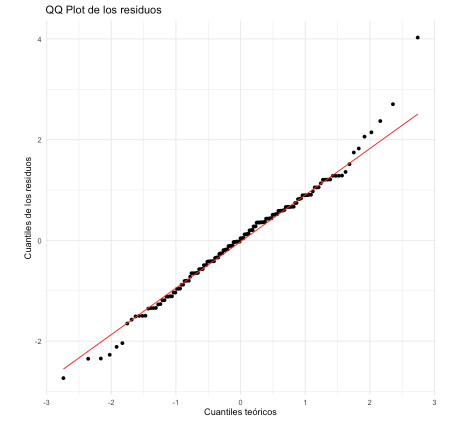

6. Se analizan los puntos influyentes
    * **La observación 163 es influyente porque es un outlier que tiene un alto leverage (*0.127*) y una distancia de Cook grande (*1.187*)**
    * Es un punto de alto leverage malo: residuo ALTO (efecto palanca, influye fuertemente)
    * La presencia de este punto puede cambiar el modelo de regresión
    * Se concluye que hay que eliminar el punto y volver a hacer el análisis de la regresión sin el outlier

7. Análisis de la regresión sin el outlier

```
Call:
lm(formula = precio ~ cal1, data = datos_sin_o)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7715  -3.7715   0.2892   4.1071  15.9858 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -21.6558     5.1036  -4.243 3.72e-05 ***
cal1          3.1214     0.2465  12.663  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.18 on 160 degrees of freedom
Multiple R-squared:  0.5006,	Adjusted R-squared:  0.4974 
F-statistic: 160.4 on 1 and 160 DF,  p-value: < 2.2e-16
```

* Se observan p-values chicos => los estimados son significativas
* Los coeficientes estimados son distintos de 0
* $R^2$ representa la explicabilidad del modelo, este modelo explica el 50% de la variabilidad observada y es similar al $R^2$ ajustado lo que representa un buen ajuste del modelo
* El p-value del F-statistic es chico, representa que el modelo es globalmente significativo

8. Se verifica el cumplimiento de los suspuestos del modelo sin el outlier

9. Se analizan los puntos influyentes y no se detecta ninguna observación con distancia de Cook que superen el umbral

## Comparación de ambos modelos
---

* Las **variables son significativas en ambos modelos**
* En el caso del modelo sin outlier diminuye levemente el $R^2$
* El modelo sin outlier tiene un residual standard error levemente menor
* La observacion 163 al tener una distancia de cook que supera al umbral puede estar sobreajustando al modelo

## Elección del modelo
---

* Modelo sin outlier

$$\hat{precio} = -21.6558 + 3.1214 cal1$$

## Scatter plot donde se visualizan los puntos, la recta encontrada y bandas de confianza del 95 % para la media
---

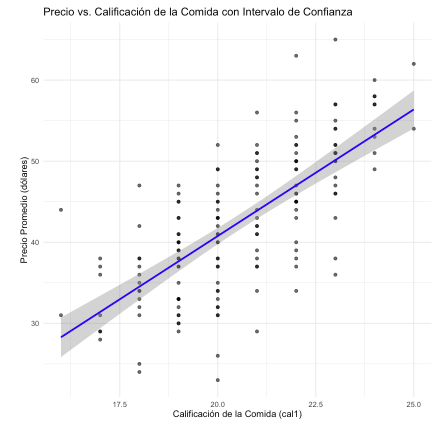

* Las bandas de confianza son estrechas, sugiere un buen ajuste del modelo
* El gráfico no sólo valida la relación positiva y lineal entre ambas variables, sino que también cuantifica visualmente la confianza en las predicciones del precio medio, indicando que el modelo ajustado proporciona estimaciones más precisas en el rango central de las calificaciones de comida.

---
---

# Punto 2
---

## Objetivo del análisis
---

* Ajustar un modelo de regresión lineal que explique el precio en función de todas las variables continuas presentes en el archivo

## Datos utilizados
---

* Se analizaron datos de 162 restaurantes, incluyendo las siguientes variables:

| Variable     | Descripción                                                                                         |
| --           | --                                                                                                  |
| **precio**   | precio promedio (en dólares) de una cena con bebida y propina incluida                              |
| **cal1**     | calificación otorgada por los clientes a la comida (escala de 0 a 30)                               |
| **decor**    | calificación otorgada a la ambientación y decoración del restaurante (escala de 0 a 30)             |
| **servicio** | calificación del servicio recibido (escala de 0 a 30)                                               |
| **cal2**     | segunda medición independiente sobre la calidad de la comida, provista por un evaluador externo en una escala comparable |

## Metodología
---

1. Se exploa como se relacionan las variables **precio**, **cal1**, **decor**, **servicio** y **cal2** entre sí, utilizando un gráfico de dispersión (scatter plot)
    * La variable respuesta **precio** parece estar estrechamente relacionada con todas las variables explicativas mencionadas
    * Además, se observa relaciones de linealidad entre algunas variables explicativas o predictoras

2. Se obtiene la matriz de correlación

| precio   | cal1 |	decor	| servicio	| cal2 |
| --       | --   | -- | -- | -- |
| precio   | 1.00 | 0.71 |	0.73 |	0.68 |	0.67 |
| cal1	   | 0.71 |	1.00 |	0.63 |	0.84 |	0.97 |
| decor	   | 0.73 |	0.63 | 	1.00 |	0.62 |	0.59 |
| servicio | 0.68 |	0.84 |	0.62 |	1.00 |	0.84 |
| cal2	   | 0.67 |	0.97 |	0.59 |	0.84 |	1.00 |


* Se observa una moderada/alta correlación entre la variable **precio** y las variables predictoras {**cal1**: *0.71*, **decor**: *0.73*, **servicio**: *0.68*, **cal2**: *0.67*}
* **La alta correlación entre algunos predictores sugiere que existe multicolinealidad basada en datos**

3. Se propone un modelo de regresión lineal

```
Call:
lm(formula = precio ~ ., data = datos_sin_lugar)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.092  -3.242  -0.017   3.907  13.854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -26.0794     4.4366  -5.878 2.41e-08 ***
cal1          1.9870     0.8607   2.309   0.0223 *  
decor         1.6565     0.2310   7.172 2.74e-11 ***
servicio      0.5927     0.3979   1.489   0.1384    
cal2         -0.6180     0.7946  -0.778   0.4379    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.262 on 157 degrees of freedom
Multiple R-squared:  0.6447,	Adjusted R-squared:  0.6356 
F-statistic: 71.21 on 4 and 157 DF,  p-value: < 2.2e-16
```

* Se observan p-values chicos => los estimados son significativas, excepto servicio y cal2 
* $R^2$ representa la explicabilidad del modelo, este modelo explica el 64% de la variabilidad observada y es similar al $R^2$ ajustado lo que representa un buen ajuste del modelo
* El p-value del F-statistic es chico, representa que el modelo es globalmente significativo 

4. Se verifica el cumplimiento de los supuestos usando resúmenes, gráficos y pruebas estadísticas
   * Se analizan los residuos vs. valores ajustados => los puntos están distribuidos de una manera simétrica, pensando que el concepto de homogeneidad se cumple
   * Se analizan los residuos vs. variables regresoras => no se observan estructuras claras, es decir, la distribución es aleatoria, validandose el supuesto de homocedasticidad de los residuos
   * Se valida el supuesto de normalidad de los residuos mediante un gráfico QQ-plot, observando que los errores se distribuyen normalmente

5. Se analizaron los puntos influyentes
    * No se detecta ninguna observación que supere el umbral de Cook

6. Se obtiene el factor de inflación de la varianza (vif) del modelo para detectar colinealidad entre variables predictoras
    * **cal1**: *16.8141476494499*  => MULTICOLINEALIDAD ALTA
    * **decor**: *1.75538527499416* => MULTICOLINEALIDAD MODERADA
    * **servicio**: *3.78855912817584* => MULTICOLINEALIDAD MODERADA
    * **cal2**: *15.7808151249288* => MULTICOLINEALIDAD ALTA

7. Se analizan distintos modelos combinando las variables regresoras:
    * 1- precio ~ cal1 + decor + servicio
    * 2- precio ~ cal2 + decor + servicio
    * 3- precio ~ cal1 + decor
    * 4- precio ~ cal2 + decor
    * 5- precio ~ servicio + decor

* Se observa que los mejores indicadores (R2 ajustado, siginificancias de las variables regresoras, el p-valor del estadístico F y el vif) están asociados a los siguiente modelos:
    * 3- precio ~ cal1 + decor
    * 4- precio ~ cal2 + decor
    * 5- precio ~ servicio + decor

8. Selección de variables y validación cruzada
    * Se definen los conjunto de entrenamiento (0.80 %) y test (0.20 %) 
    * Elección de variables sobre el 80% de los datos mediante método exhaustivo
    * Tabla resumen

```
| Variables| R2_ajustado|      BIC|
|---------:|-----------:|--------:|
|         1|       0.552|  -96.462|
|         2|       0.649| -124.380|
|         3|       0.658| -124.154|
|         4|       0.658| -120.213|
```

* Mejor R2 ajustado => 3 variables => precio ~ cal1 + decor + servicio
* Mejor BIC =======> 2 variables => precio ~ cal1 + decor

9. Modelo BIC
```
Call:
lm(formula = precio ~ cal1 + decor, data = datos_sin_lugar)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6182  -3.4218   0.1376   3.8451  14.1300 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -25.7431     4.3837  -5.872 2.43e-08 ***
cal1          1.8045     0.2695   6.696 3.49e-10 ***
decor         1.7482     0.2238   7.811 7.24e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.27 on 159 degrees of freedom
Multiple R-squared:  0.639,	Adjusted R-squared:  0.6345 
F-statistic: 140.8 on 2 and 159 DF,  p-value: < 2.2e-16
```

10. Modelo R2 ajustado

```
Call:
lm(formula = precio ~ cal1 + decor + servicio, data = datos_sin_lugar)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.1752  -3.3003   0.0362   3.8184  13.9664 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -26.4651     4.4033  -6.010 1.23e-08 ***
cal1          1.3952     0.4018   3.472 0.000665 ***
decor         1.6765     0.2293   7.313 1.23e-11 ***
servicio      0.5349     0.3904   1.370 0.172635    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.255 on 158 degrees of freedom
Multiple R-squared:  0.6433,	Adjusted R-squared:  0.6365 
F-statistic: 94.98 on 3 and 158 DF,  p-value: < 2.2e-16
```

## Elección del modelo
---

* Se observa que en el modelo R2 ajustado, la variable **servicio** no es significativa
* R2 de ambos modelos son similares
* Se concluye, que como el modelo BIC es mas simple (menos variable = parsimonioso), se lo elije
* Se verifica el cumplimiento de los suspuestos del modelo

---
---

# Punto 3
---

## Objetivo del análisis
---

*  Estudiar el impacto de la calificación cal1 de acuerdo al lugar donde se ubica el restaurante

## Datos utilizados
---

* Se analizaron datos de 162 restaurantes, incluyendo las siguientes variables:

| Variable     | Descripción                                                                                         |
| --           | --                                                                                                  |
| **precio**   | precio promedio (en dólares) de una cena con bebida y propina incluida                              |
| **cal1**     | calificación otorgada por los clientes a la comida (escala de 0 a 30)                               |
| **lugar**    | variable categórica que indica si el restaurante está al este o al oeste de una determinada avenida |

## Metodología
---

1. Se convierte la variable predictora **lugar** a factor, por ser una variable categórica

2. Se visualizan los datos mediante un scatter plot

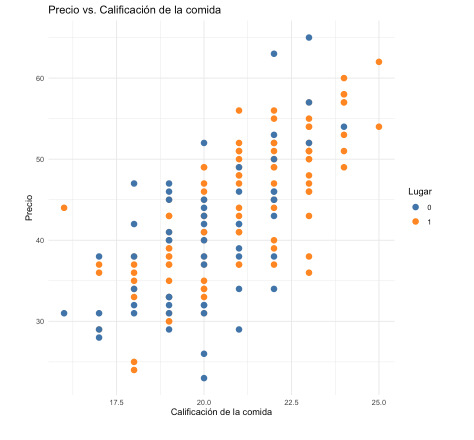

* Se observan dispersiones similares
* Se visualiza una relación lineal

3. Se proponen dos modelos: modelo de regresión sin interacción y modelo de regresión con interacción
    * precio ~ cal1 + lugar
    * precio ~ cal1 * lugar

4. Modelo de regresión sin interacción

```
Call:
lm(formula = precio ~ cal1 + lugar, data = datos_con_lugar)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.2321  -3.3759  -0.0264   3.8678  16.6161 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -21.2852     5.1257  -4.153 5.35e-05 ***
cal1          3.0759     0.2522  12.194  < 2e-16 ***
lugar1        0.8921     1.0325   0.864    0.389    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.184 on 159 degrees of freedom
Multiple R-squared:  0.5029,	Adjusted R-squared:  0.4966 
F-statistic: 80.42 on 2 and 159 DF,  p-value: < 2.2e-16
```

* Se observa que la variable **lugar** no es significativa, ya que su p-value es mayor a 0.05
* Se observa que $R^2$ explica el 50% de los casos. Es bueno que los dos valores de $R^2$ y $R^2$ ajustado sean similares

5. Modelo de regresión con interacción

```
Call:
lm(formula = precio ~ cal1 * lugar, data = datos_con_lugar)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.232  -3.371  -0.031   3.868  16.624 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -21.203880   9.270711  -2.287   0.0235 *  
cal1          3.071815   0.460213   6.675 3.97e-10 ***
lugar1        0.774002  11.246987   0.069   0.9452    
cal1:lugar1   0.005808   0.550975   0.011   0.9916    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.204 on 158 degrees of freedom
Multiple R-squared:  0.5029,	Adjusted R-squared:  0.4934 
F-statistic: 53.28 on 3 and 158 DF,  p-value: < 2.2e-16
```

* No cambian los coeficientes de **intercept** y *cal1** respecto del modelo anterior
* Cambia p-value del intercept 
* Se mantienen los valores de $R^2$ y el p-valor del estadístico F (sigue siendo bajo)
* **El término de la interacción no es significativo. Esto indica que no existe una interacción significativa entre las variables**

6. Se obtiene el factor de inflación de la varianza (vif) del modelo con interacción
    * **cal1** : 3.45844991606041  => MULTICOLINEALIDAD MODERADA
    * **lugar**: 123.283545540867  => MULTICOLINEALIDAD ALTA
    * **cal1:lugar** : 132.821603324448 => MULTICOLINEALIDAD ALTA

7. Se corrige la multicolinealidad centrando la variable numérica continua

8. Se genera nuevamente el modelo 

```
Call:
lm(formula = precio ~ cal1_c * lugar, data = datos_con_lugar)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.232  -3.371  -0.031   3.868  16.624 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.109640   0.845508  49.804  < 2e-16 ***
cal1_c         3.071815   0.460213   6.675 3.97e-10 ***
lugar1         0.893711   1.047596   0.853    0.395    
cal1_c:lugar1  0.005808   0.550975   0.011    0.992    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.204 on 158 degrees of freedom
Multiple R-squared:  0.5029,	Adjusted R-squared:  0.4934 
F-statistic: 53.28 on 3 and 158 DF,  p-value: < 2.2e-16
```

9. Se obtiene el factor de inflación de la varianza (vif) del último modelo, observándose multicolinealidad leve
    * **cal1_c**: 3.45844991606043
    * **lugar** : 1.06959669856493
    * **cal1_c:lugar** : 3.33637367264153

10. Scatter plot con la recta ajustada en cada grupo

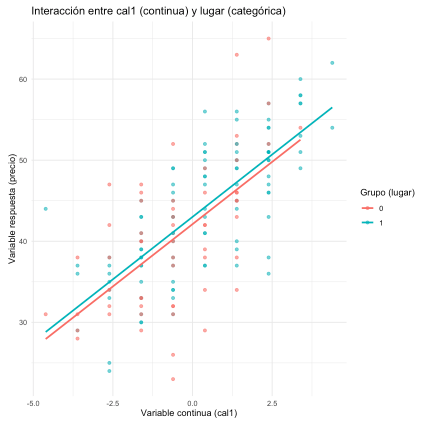

* Ambas rectas tienen la misma pendiente, lo que significa que la relación entre **precio** y **cal1** no se ve afectada por **lugar**
* La relación entre **cal1** y **precio** es positiva, lo que significa que a mayor calificación mayor precio 

11. Se verifica el cumplimiento de los supuestos usando resúmenes, gráficos y pruebas estadísticas
    * Se analizan los residuos vs. valores ajustados => los puntos están distribuidos de una manera simétrica, pensando que el concepto de homogeneidad se cumple
    * Se analizan los residuos vs. variables regresoras => no se observan estructuras claras, es decir, la distribución es aleatoria, validandose el supuesto de homocedasticidad de los residuos
    * Se valida el supuesto de normalidad de los residuos mediante un gráfico QQ-plot, observando que los errores se distribuyen normalmente

12. No se observan puntos influyentes

## Modelo obtenido
---

$$\hat{precio}  = 42.109 + 3.071 cal1_c + 0.893 lugar + 0.005 cal1_c * lugar$$

## Interpretación
---

* $𝛽_0$: Ordenada al origen (intercept). Es el valor de Y cuando **cal1** y **lugar** son 0
* $𝛽_1$: Indica el cambio de **precio** por cada unidad de **cal1**
* $𝛽_2$: Indica el cambio de **precio** dependiendo del **lugar** (0 o 1)
* $𝛽_3$: Representa la interacción entre **cal1** y el **lugar**. Es el cambio adicional en al pendiente de **cal1** cuando **lugar** es 1

* A modo de conclusión, el efecto de **cal1** sobre **precio** es consistente en todos los **"lugares"**

---
---

# Punto 4
---

## Objetivo del análisis
---

* Elaborar un modelo de regresión lineal con datos de hombres con cáncer de próstata que se examinaron antes de una operación

## Datos utilizados
---

* Se analizaron datos de 97 hombres con cáncer de próstata que se examinaron antes de una operación, incluyendo las siguientes variables:

| Variable     | Descripción                          |
| --           | --                                   |
| **lcavol**   | log del volumen del cáncer           |
| **lpeso**    | log del peso de la próstata          |
| **edad**     | edad del paciente                    |
| **lhiper**   | log de hiperplasia benigna           |
| **iv**       | invasión vesical (binaria)           |
| **lpc**      | log de penetración capsular          |
| **gleason**  | puntaje de Gleason                   | 
| **pgg45**    | porcentaje de células con patrón 4 o 5 |
| **lpsa**     | log del nivel del antígeno prostático específico (PSA) – variable respuesta |

## Metodología
---

1. Se explora como se relacionan todas las variables utilizando un gráfico de dispersión (scatter plot)

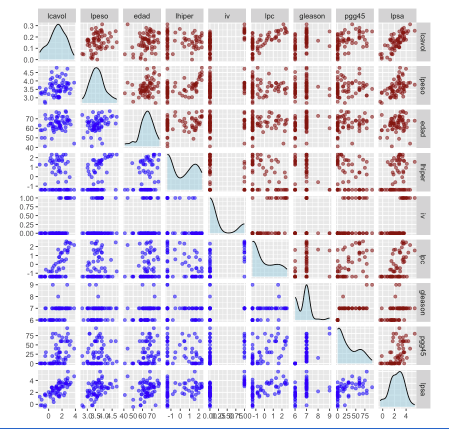

* Se observa linealidad en la relación de la variable respuesta **lpsa** con las variables **lcavol**, **lpeso**, **lpc**

2. Se propone un modelo de regresión lineal

```
Call:
lm(formula = lpsa ~ ., data = datos4)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36768 -0.31610 -0.06186  0.25187  1.34656 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.352212   1.279326  -0.275   0.7841    
lcavol       0.457406   0.095869   4.771 1.48e-05 ***
lpeso        0.499621   0.195477   2.556   0.0135 *  
edad        -0.023870   0.010782  -2.214   0.0312 *  
lhiper       0.299314   0.061952   4.831 1.20e-05 ***
iv           1.139018   0.245779   4.634 2.37e-05 ***
lpc         -0.074570   0.090851  -0.821   0.4154    
gleason      0.218317   0.167169   1.306   0.1972    
pgg45        0.006699   0.004312   1.554   0.1262    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5548 on 53 degrees of freedom
Multiple R-squared:  0.8252,	Adjusted R-squared:  0.7988 
F-statistic: 31.28 on 8 and 53 DF,  p-value: < 2.2e-16
```

* Las variables regresoras **lpc**, **gleason** y **pgg45** no son significativas
* Las variables regresoras **lcavol**, **lpeso**, **edad**, **lhiper** y **iv** son significativas
* **Tanto R2 como R2 ajustado son altos y similares, explican el 82% y 79% respectivamente**

3. Se verifica el cumplimiento de los supuestos usando resúmenes, gráficos y pruebas estadísticas
    * Se analizan los residuos vs. valores ajustados => los puntos están distribuidos de una manera simétrica, pensando que el concepto de homogeneidad se cumple
    * Se analizan los residuos vs. variables regresoras => no se observan estructuras claras, es decir, la distribución es aleatoria, validandose el supuesto de homocedasticidad de los residuos
    * Se valida el supuesto de normalidad de los residuos mediante un gráfico QQ-plot, observando que los errores se distribuyen normalmente

4. Se visualiza que las variables **iv** y **gleason** son categóricas

5. Se analizan los puntos influyentes
    * No se detecta ninguna observación que supere el umbral de Cook
    * No se detecta ningún punto influyente

6. Se analiza la multicolinealidad:
    * **lcavol**: 2.70075375915355
    * **lpeso**: 1.51808142255376
    * **edad**: 1.30748372954313
    * **lhiper**: 1.62121921029172
    * **iv**: 2.01620143460216
    * **lpc**: 3.02757448391407
    * **gleason**: 2.43067324361368
    * **pgg45**: 2.99822669459834

* Como los valores del vif son mayores que 1 y menores que 5, supone una multicolinealidad moderada, lo que generalmente no es motivo de preocupación

7. Se definen los conjunto de entrenamiento (0.80 %) y test (0.20 %)
8. Elección de variables sobre el 80% de los datos mediante método exhaustivo

```
| Variables| R2_ajustado|     BIC|
|---------:|-----------:|-------:|
|         1|       0.575| -35.976|
|         2|       0.672| -46.098|
|         3|       0.771| -61.289|
|         4|       0.782| -60.878|
|         5|       0.794| -60.785|
|         6|       0.796| -58.604|
|         7|       0.792| -54.937|
|         8|       0.788| -51.236|
```

* Mejor R2 ajustado => 6 variables => lpsa ~ lcavol + lpeso + edad + lhiper + iv + pgg45
* Mejor BIC =======> 3 variables => lpsa ~ lcavol + lhiper + iv

* Modelo AIC => lpsa ~ lcavol + lhiper + iv + pgg45 + lpeso + edad + gleason


9. Se entrena cada modelo lineal (BIC, R2, AIC) con validación cruzada en train-data

10. Se arma la tabla resumen con los resultados del entranamiento de cada modelo

```
| BIC_RMSE| R2_RMSE| AIC_RMSE| BIC_R2| R2_R2| AIC_R2| BIC_MAE| R2_MAE| AIC_MAE|
|--------:|-------:|--------:|------:|-----:|------:|-------:|------:|-------:|
|    0.599|   0.595|    0.617|  0.764| 0.828|  0.746|   0.492|  0.473|   0.506|
```

11. Se hacen predicciones con el modelo ganador sobre las variables correctas

12. Se arma la tabla de resumen con los resultados de RMSE (Root Mean Squared Error)

```
| CV_BIC_80| CV_BIC_20| CV_R2_80| CV_R2_20| CV_AIC_80| CV_AIC_20|
|---------:|---------:|--------:|--------:|---------:|---------:|
|     0.599|     0.659|    0.595|    0.511|     0.617|     0.481|
```

* Se observa que en ninguno de los modelos no difiere mucho del RMSE obtenido en el entrenamiento
* **No hay evidencia de overfitting**

13. Modelo final BIC

```
Call:
lm(formula = formula_bic, data = datos4)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4875 -0.3663 -0.0018  0.4379  1.0958 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.46701    0.11406  12.862  < 2e-16 ***
lcavol       0.52211    0.08208   6.361 3.44e-08 ***
lhiper       0.33382    0.05685   5.872 2.21e-07 ***
iv           1.23478    0.25127   4.914 7.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6135 on 58 degrees of freedom
Multiple R-squared:  0.7662,	Adjusted R-squared:  0.7541 
F-statistic: 63.34 on 3 and 58 DF,  p-value: < 2.2e-16
```

14. Modelo final R2

```
Call:
lm(formula = formula_R2, data = datos4)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.39210 -0.34510  0.00788  0.32212  1.25040 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.941438   0.884109   1.065  0.29160    
lcavol       0.443972   0.081284   5.462 1.17e-06 ***
lpeso        0.477554   0.196220   2.434  0.01822 *  
edad        -0.019953   0.010563  -1.889  0.06416 .  
lhiper       0.302132   0.061284   4.930 7.94e-06 ***
iv           1.019437   0.235671   4.326 6.46e-05 ***
pgg45        0.008954   0.003013   2.972  0.00439 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5584 on 55 degrees of freedom
Multiple R-squared:  0.8163,	Adjusted R-squared:  0.7963 
F-statistic: 40.73 on 6 and 55 DF,  p-value: < 2.2e-16
```

15. Modelo final AIC

```
Call:
lm(formula = formula_AIC, data = datos4)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34763 -0.32482 -0.00439  0.26765  1.31712 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.383974   1.274871  -0.301   0.7644    
lcavol       0.417780   0.082576   5.059 5.19e-06 ***
lhiper       0.308040   0.060849   5.062 5.14e-06 ***
iv           1.097111   0.239690   4.577 2.81e-05 ***
pgg45        0.005280   0.003938   1.341   0.1856    
lpeso        0.497216   0.194864   2.552   0.0136 *  
edad        -0.023364   0.010732  -2.177   0.0339 *  
gleason      0.236370   0.165215   1.431   0.1583    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5531 on 54 degrees of freedom
Multiple R-squared:  0.823,	Adjusted R-squared:  0.8001 
F-statistic: 35.87 on 7 and 54 DF,  p-value: < 2.2e-16
```

## Elección del modelo
---

* Se elige el modelo BIC porque:
    * Tiene un RMSE ligeramente menor, lo que indica predicciones más precisas
    * Tiene un R-squared que no es el mayor pero muy poca diferencia con los otros modelos
    * Tiene un MAE menor, lo que indica, en promedio, errores de predicción más pequeños
    * Es mas parsimonioso (tiene menos variables que el resto de los modelos)
    * Tanto BIC como AIC coincide en las variables mas significativas: lcavol, lhiper, iv